In [1]:
import sys
sys.path.append("../")
%matplotlib inline
import numpy as np
import torch
import skimage.io as io
import matplotlib.pyplot as plt

import augments

In [2]:
HR = io.imread("Canon_003_HR.png")
LR = io.imread("Canon_003_LR4.png")

# Thse are taken from the paper but I added unsqueeze() in the im2tensor

def im2tensor(im):
    np_t = np.ascontiguousarray(im.transpose((2, 0, 1)))
    tensor = torch.from_numpy(np_t).float().unsqueeze(0)
    return tensor

def tensor2im(tensor):
    tensor = tensor.detach().squeeze(0)
    im = tensor.clamp(0, 255).round().cpu().byte().permute(1, 2, 0).numpy()
    return im

print(im2tensor(LR).shape)

im1,im2 = augments.cutblur(im2tensor(HR),im2tensor(LR),1,0.5)



torch.Size([1, 3, 2100, 1600])


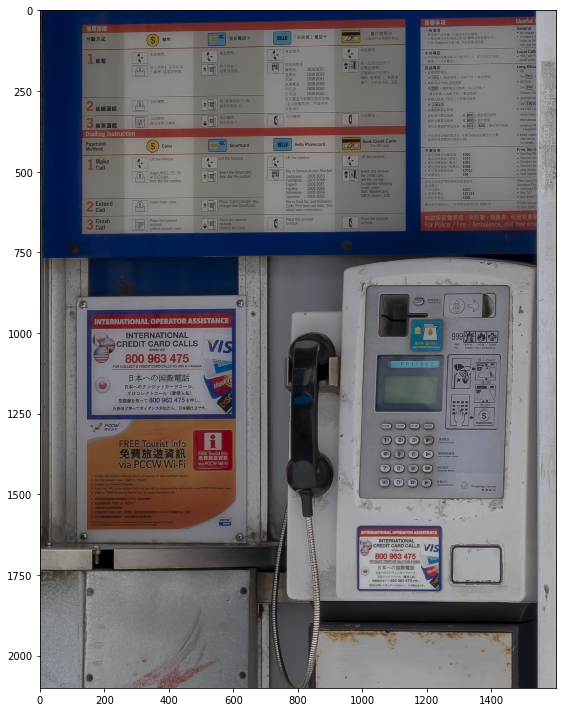

In [3]:
plt.figure(figsize=(20,10))
io.imshow(HR)

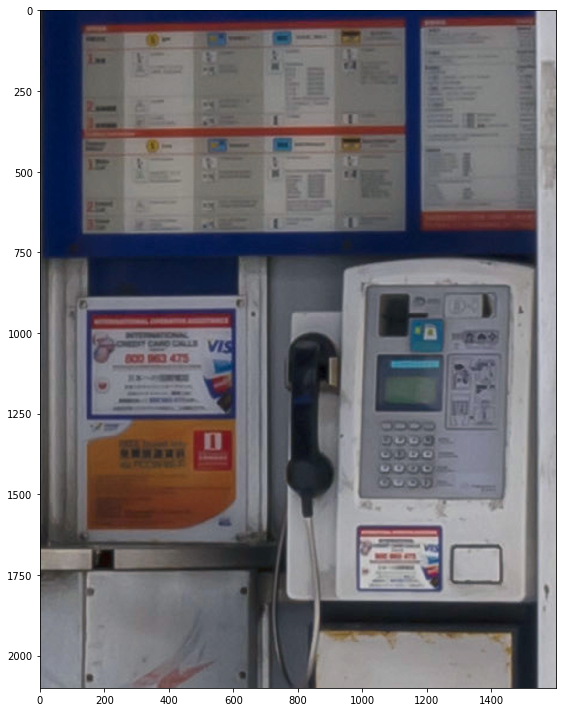

In [4]:
plt.figure(figsize=(20,10))
io.imshow(LR)

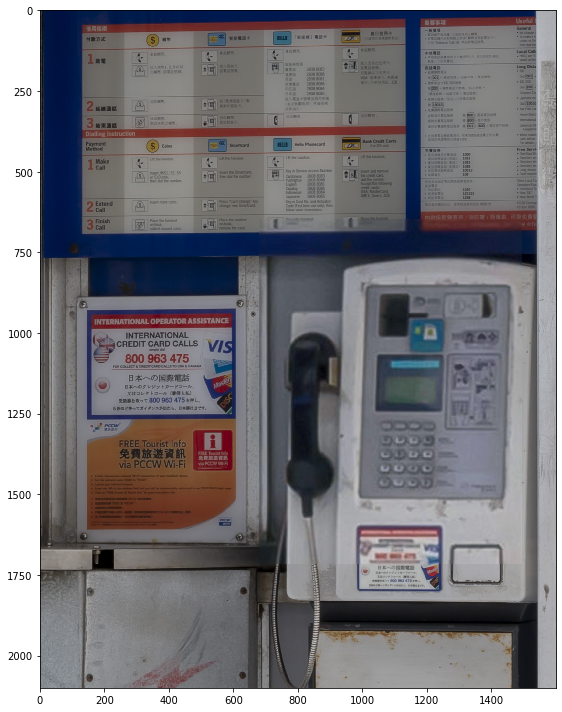

In [5]:
plt.figure(figsize=(20,10))
io.imshow(tensor2im(im2))
io.show()

In [6]:
# test augment_image works
im11,im12,mask,aug = augments.augment_image(im2tensor(HR),im2tensor(LR),["cutblur"],[1],[0.5])

In [7]:
aug

'cutblur'

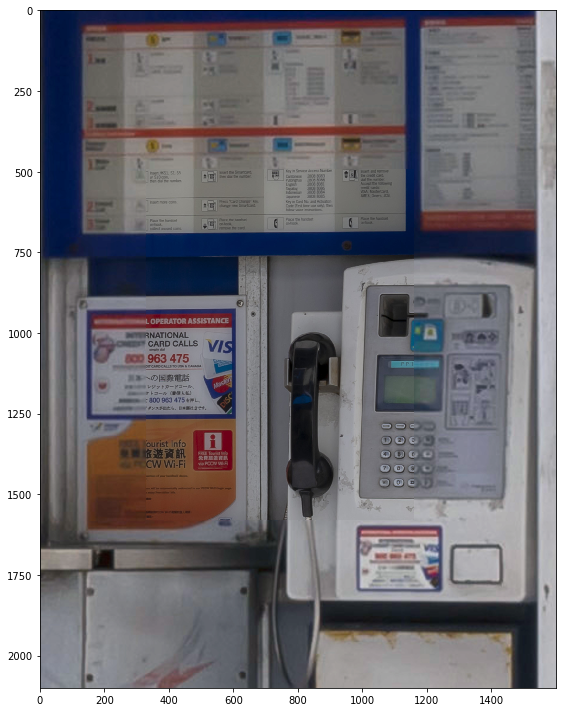

In [8]:
plt.figure(figsize=(20,10))
io.imshow(tensor2im(im12))
io.show()